# Homework 3: Integrating differential equations
**Due Thursday, January 31**  

David Nelson

## Background

This problem is based on Exercise 8.2 in Newman's *Computational Physics*. The [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka–Volterra_equations) provide a simple a model of the population dynamics of predators and prey. They also naturally appear in some physical models and in economics.

Let $x$ be proportional to the population of prey animals (traditionally called "rabbits"), and  let $y$ be proportional to the population of predators (traditionally called "foxes").

In this model the rabbits reproduce at a constant rate, but they are also eaten by the foxes. The foxes reproduce at a rate proportional to how much they eat, but they also die of old age. 

The Lotka-Volterra equations are  

$$
\begin{align} \begin{aligned}
\frac{dx}{dt} &= \alpha x - \beta x y\,,\\  
\frac{dy}{dt} &= \gamma x y - \delta y\,.  
\end{aligned} \end{align}
$$
 
The dimensionless parameters $\alpha$, $\beta$, $\gamma$, and $\delta$ are positive real numbers that characterize the interaction of the two species.

## 1. Understanding the problem

In the Markdown cell below, explain the meaning of the parameters $\alpha$, $\beta$, $\gamma$, and $\delta$. What happens in the case when $\beta = \gamma = 0$?

**Fill in the following**:
* $\alpha$ is the rabbit reproduction rate. This is because the rate of change of the rabbit population ($\dot{x}$) has a term $\alpha x$, which makes the population increase at a rate proportional to the population itself.   
* $\beta$ is the rabbit morbidity rate which associates the fox and rabbit population to a decreases in rabbit population.
* $\gamma$ is the fox population which associates the consumption of rabbits and hunting population of foxs to an effect on fox total population. 
* $\delta$ is the fox mortality rate. This is because the rate of change of the fox population decreases at a rate proportional to the population itself. 
* The special case $\beta = \gamma = 0$ is analytically solvable. In that case the populations don't affect each other. The solution to the ODE is an exponential in both cases. The rabbits will reproduce exponentially while the foxes will die exponentially.

## 2. Coding the dynamics

Let's build the code to understand this system. We have two first order differential equations,

$$
\begin{align} \begin{aligned}
\frac{dx}{dt} &= f(x, y, t)\,,\\  
\frac{dy}{dt} &= g(x, y, t)\,.  
\end{aligned} \end{align}
$$

Let these be functions of global variables, $\alpha=$ `a`, $\beta=$ `b`, $\gamma=$ `c`, and $\delta=$ `d`. We can integrate these in the same way that we would approach a single differential equation. The only tricky thing to consider in this case is that we should update the values of $x$ and $y$ at the same time, rather than sequentially.

### 2.a. Defining the parameters and derivative functions

Fill this in to set up the problem:

In [1]:
# We can define all parameters at once

a, b, c, d = .6, 1.3, 1.0, 1.0

def f(x, y, t):
    """
    This is the rate of change of rabbits as a function 
    of the current number of rabbits (x), the current number
    of foxes (y), and the current time (t).
    """
    
    return a*x - b*x*y

def g(x, y, t):
    """
    This is the rate of change of foxes as a function 
    of the current number of rabbits (x), the current number
    of foxes (y), and the current time (t).
    """
    return c*x*y - d*y 

In [2]:
# Test your code: you should get 0.047 and -0.09:
print( f(.1, .1, 0) )
print( g(.1, .1, 0) )

0.047
-0.09


### 2.b. Time evolution 

At $t=0$, use the **initial conditions** $x(0) = y(0) = 2$. We would like to know what happens to the populations from the initial time $t=0$ to a later time $t=5$. In this case, we aren't particularly concerned about the units of $t$.

Use **Euler's method** to generate Python arrays `xlist` and `ylist`, giving the values of $x$ and $y$ over time. Use a time step of $\Delta t = 0.005$.

Then, plot the populations as a function of time using `seaborn` and/or `matplotlib`. 

As always, feel free to consult each other, previous work/notes in this course, and resources online. Make sure to reference any outside sources that you use.

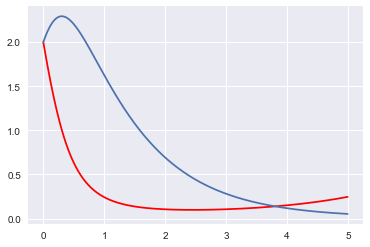

In [20]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.005
time = np.arange(0,5,0.005)

xlist = []# FILL IN, initialize array
ylist = []# FILL IN, initialize array

x = x0
y = y0
for t in time:
    xlist.append(x)
    ylist.append(y)
    x = x + (dt * f(x,y,t))
    y = y + (dt * g(x,y,t))
  
# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW

plt.plot(time, xlist,'r')
plt.plot(time, ylist)

### 2.c. Discussion

Your plot should look something like this:

<img src="rabbits-foxes.png" width=500>

In your own words, explain what is going on with the rabbit and fox populations over the time period shown. What do you expect will happen as these populations continue to dynamically evolve?

Initially, the rabbit rate of change is positive, however the overall population is low as to lead to a decaying rate of repopulation of foxs. I predict the rabbit population reach a maxima with a trailing positive inflection of fox population growth.


### 2.d. Evolution into the future

Copy your code from part 2.b and paste it into the empty cell below. Re-run the code to go from $t=0$ to $t=25$.

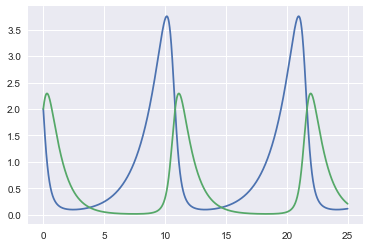

In [14]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.005
time = np.arange(0,25,0.005)

xlist = []# FILL IN, initialize array
ylist = []# FILL IN, initialize array

x = x0
y = y0
for t in time:
    xlist.append(x)
    ylist.append(y)
    x = x + (dt * f(x,y,t))
    y = y + (dt * g(x,y,t))
  
# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW

plt.plot(time, xlist)
plt.plot(time, ylist)

### 2.e. Other initial conditions

Copy your code from part 2.b and paste it into the empty cell below. Re-run the code with a different set of Lotka-Volterra parameters:

```python
a, b, c, d = 4, 2, 3, 3
```

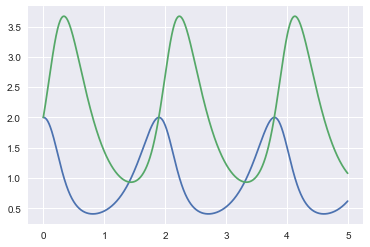

In [15]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = 4, 2, 3, 3

x0 = 2
y0 = 2
dt = 0.005
time = np.arange(0,5,0.005)

xlist = []# FILL IN, initialize array
ylist = []# FILL IN, initialize array

x = x0
y = y0
for t in time:
    xlist.append(x)
    ylist.append(y)
    x = x + (dt * f(x,y,t))
    y = y + (dt * g(x,y,t))
  
# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW

plt.plot(time, xlist)
plt.plot(time, ylist)

### 2.f. Instability

Let's see what happens if the integration parameters are chosen poorly. 

Once again, copy your code from part 2.b and paste it into the empty cell below. You should be back to the original set of  Lotka-Volterra parameters:

```python
a, b, c, d = .6, 1.3, 1, 1
```

But this time, let's try to be cheap and use a much bigger time step. Try using `dt = 0.5` and integrating from $t=0$ to $t=5$. This should look nothing like the behavior you expect from the plots you produced earlier. Can you explain what went wrong?



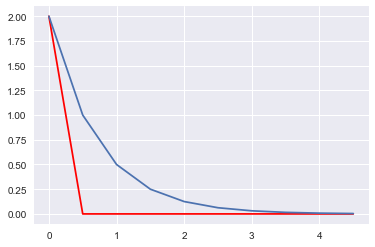

In [21]:
# A reminder of our earlier parameters

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.5
time = np.arange(0,5,dt)

xlist = []# FILL IN, initialize array
ylist = []# FILL IN, initialize array

x = x0
y = y0
for t in time:
    xlist.append(x)
    ylist.append(y)
    x = x + (dt * f(x,y,t))
    y = y + (dt * g(x,y,t))
  
# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW

plt.plot(time, xlist, 'r')
plt.plot(time, ylist)

The step size was inadiquately fine for a solutions that portrays the model. The rabbit population is plots two lines: the rate of change is near constant and so the euler method produces a line. The step size skipped the features of the 'hump' characteristic of the fox population. This results in a near parabolic decay.

## 3. Population Dynamics Phase Space

By now you've noticed the periodic behavior of the system. We can visualize how the predator and prey populations are related with a phase space plot. 

### 3.a. Plotting in the predator-prey plane

Copy the code from part 2.d above, where we integrated from $t=0$ to $t=25$, and modify it so that it plots the rabbit and fox populations on the horizontal and vertical axes, respectively. Note that, if you're using `seaborn` to make the line plot, you'll want to pass in an additional argument so that it appears correctly, like this:

```python
sns.lineplot(my_x, my_y, sort=False)
```

You'll need to define `my_x` and `my_y`.

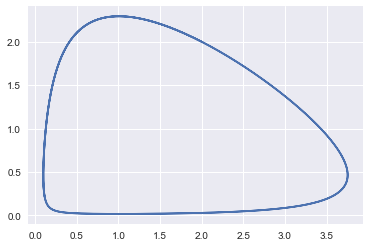

In [18]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

a, b, c, d = .6, 1.3, 1.0, 1.0

x0 = 2
y0 = 2
dt = 0.005
time = np.arange(0,25,0.005)

xlist = []# FILL IN, initialize array
ylist = []# FILL IN, initialize array

x = x0
y = y0
for t in time:
    xlist.append(x)
    ylist.append(y)
    x = x + (dt * f(x,y,t))
    y = y + (dt * g(x,y,t))
  
# FILL IN TO PRODUCE THE PLOT SHOWN IN PART c BELOW

plt.plot(xlist, ylist)


### 3.b. The velocity in population space

**Quiver plots** are what `matplotlib` calls plots of vector fields. Here's an example of how they work:

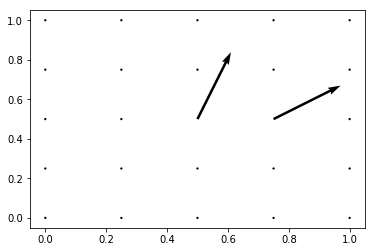

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# base positions of the vectors
x = np.linspace(0,1,5)
y = np.linspace(0,1,5)

# magnitude of the x- and y-components of each vector
u = np.zeros((5,5)) # initialize to zero everywhere
v = np.zeros((5,5)) # initialize to zero everywhere

u[2,2] = .1 # x-component of vector at (2,2)
v[2,2] = .2 # y-component of vector at (2,2)

u[2,3] = .2 # x-component of vector at (2,2)
v[2,3] = .1 # y-component of vector at (2,2)

plt.quiver(x, y, u, v, scale=1)
plt.show()

Make a vector field that shows the vector 

$$ \mathbf{v}(x,y) = \left (\dot x, \dot y \right)$$

at each position on the predator-prey plane. Some starter code for this is included below.

Overlay the vector field plot on the plot from Problem 3.a.

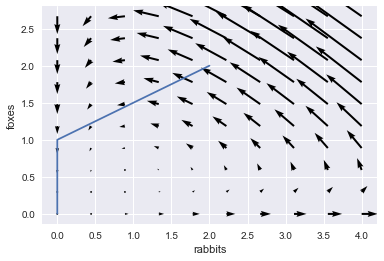

In [31]:
side = np.linspace(0, 4, 10)
XX,YY = np.meshgrid(side, side/1.5)
UU = f(XX,YY,0)
VV = g(XX,YY,0)

plt.quiver(XX,YY,UU,VV,scale=50)
plt.plot(xlist, ylist)
plt.xlabel('rabbits')
plt.ylabel('foxes')
plt.show()

This image now shows the cyclic nature of the predator and prey populations as well as how long the populations spend in different parts of the cycle.

### 3.c. Describe the dynamics

In the Markdown cell below, write a few sentences describing the cycle of rabbit and fox populations. It may be useful to think about this in terms of three "phases" corresponding to the three notable features of the plot in Problem 3.b.

The is a cyclic dynamic which keeps scarsity and surplus is a reoative equiibrium. The further from the eye the vertex, the more extreme corrections are prevelent in the system. This is denoted by the inhomogenious curl of the vector field.